<a href="https://colab.research.google.com/github/Indian-otaku/Computer_Graphics/blob/main/imagerotation%26translation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Image processing - Rotation and translation

Program to rotate an image (with multiple channels) about the origin, centre of the image and an arbitrary point wrt any angle in radians. 

Just an implementation of the rotational and translational matrix used for 2D transformations. 

Translation matrix: 
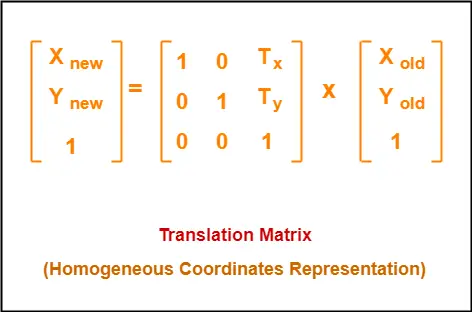

Rotation Matrix:
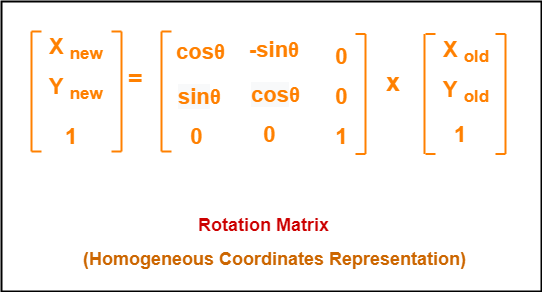

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
from pathlib import Path

In [151]:
path = Path("bocchi.jpg")
full_image = PIL.Image.open(path)
frame = np.asarray(full_image)

### Displaying and rotating just one channel of the image.

In [152]:
image = frame[:, :, 0]

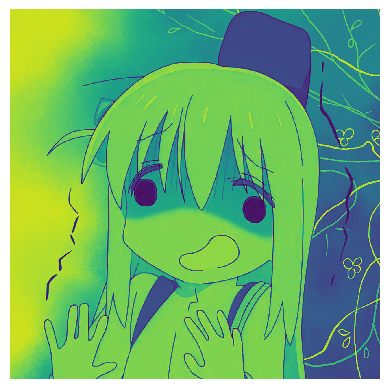

In [153]:
plt.imshow(image, interpolation='none')
plt.axis("off")
plt.show()

In [154]:
def image_rotation(image, 
        theta=np.pi/2, 
        clockwise=False, 
        centre_of_rotation="centre", 
        centre=None):
    width = image.shape[0]
    height = image.shape[1]
    rotation_matrix = np.identity(n=3, dtype=np.float16)
    rotation_matrix[0, 0] = np.cos(theta)
    rotation_matrix[0, 1] = -np.sin(theta)
    rotation_matrix[1, 0] = np.sin(theta)
    rotation_matrix[1, 1] = np.cos(theta)
    if clockwise is True:
        rotation_matrix = rotation_matrix.T
    if (centre_of_rotation == "origin"):
        t_x = 0
        t_y = 0
    elif (centre_of_rotation == "centre"):
        t_x = width / 2
        t_y = height / 2
    elif (centre_of_rotation == "arbitrary"):
        if centre is not None:
            t_x = centre[0]
            t_y = centre[1]
        else:
            print("Enter valid centre point if centre_of_rotation is set arbitrary")
            return image
    translation_matrix1 = np.identity(n=3, dtype=np.float16)
    translation_matrix1[0, 2] = -t_x
    translation_matrix1[1, 2] = -t_y
    translation_matrix2 = np.identity(n=3, dtype=np.float16)
    translation_matrix2[0, 2] = t_x
    translation_matrix2[1, 2] = t_y
    transformed_image = np.zeros_like(image)
    for i in range(width):
        for j in range(height):
            new_i, new_j, _ = np.int16(np.round(np.dot(translation_matrix2, 
                                     np.dot(rotation_matrix, 
                                            np.dot(translation_matrix1, 
                                                   [[i], [j], [1]])))))
            if (new_i >= 0 and new_j >= 0):
                try:
                    transformed_image[new_i[0], new_j[0]] = image[i, j]
                except IndexError:
                    pass
    print("Image rotation successful")
    return transformed_image

Image rotation successful


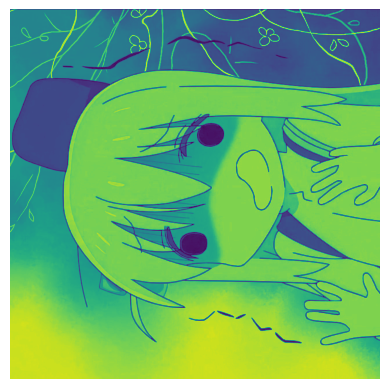

In [155]:
image = frame[:, :, 0]
result_image = image_rotation(image)
plt.imshow(result_image)
plt.axis("off")
plt.show()

Image rotation successful


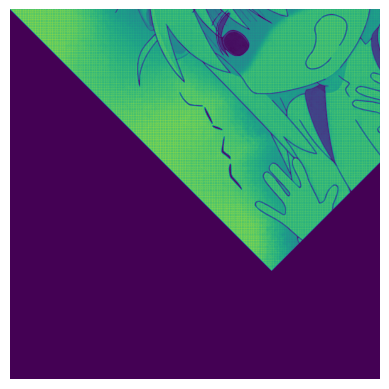

In [156]:
image = frame[:, :, 0]
result_image = image_rotation(image, theta=np.pi/4, centre_of_rotation="origin")
plt.imshow(result_image)
plt.axis("off")
plt.show()

Image rotation successful


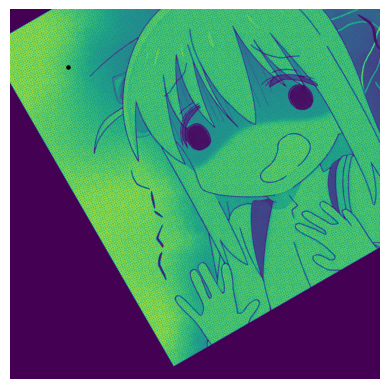

In [157]:
image = frame[:, :, 0]
result_image = image_rotation(image, theta=np.pi/6, centre_of_rotation="arbitrary", centre=(200, 200))
plt.imshow(result_image)
plt.axis("off")
plt.scatter(200, 200, s=5, c="black")
plt.show()

### Displaying and rotating the whole image (all channels)

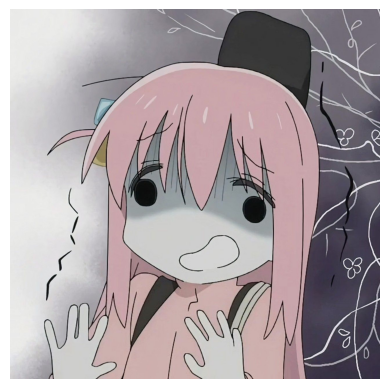

In [163]:
plt.imshow(frame)
plt.axis("off")
plt.show()

In [158]:
def full_image_rotation(full_image, 
        theta=np.pi/2, 
        clockwise=False, 
        centre_of_rotation="centre",
        centre=None):
    n_channels = full_image.shape[2]
    full_transformed_image = []
    for channel in range(n_channels):
        image = full_image[:, :, channel]
        transformed_image = image_rotation(image, 
                                          theta, 
                                          clockwise, 
                                          centre_of_rotation,
                                          centre)
        full_transformed_image.append(transformed_image)
    return np.array(full_transformed_image).transpose((1, 2, 0))

In [159]:
image = frame[:, :, 0]
print(frame.shape)
print(image.shape)

(1280, 1280, 3)
(1280, 1280)


Image rotation successful
Image rotation successful
Image rotation successful


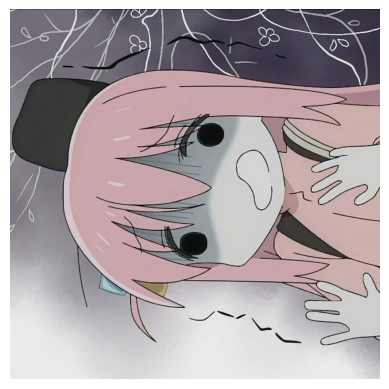

In [160]:
full_transformed_image = full_image_rotation(frame)
plt.imshow(full_transformed_image)
plt.axis("off")
plt.show()

Image rotation successful
Image rotation successful
Image rotation successful


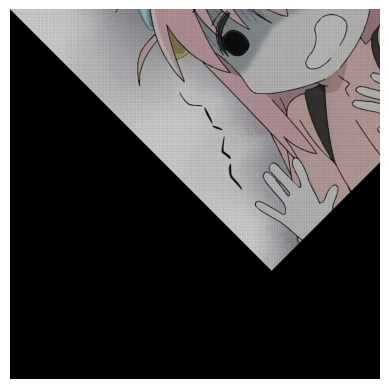

In [161]:
full_transformed_image = full_image_rotation(frame, 
                                             theta=np.pi/4, 
                                             centre_of_rotation="origin")
plt.imshow(full_transformed_image)
plt.axis("off")
plt.show()

Image rotation successful
Image rotation successful
Image rotation successful


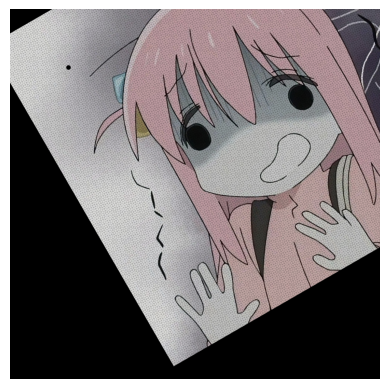

In [162]:
full_transformed_image = full_image_rotation(frame, 
                                             theta=np.pi/6, 
                                             centre_of_rotation="arbitrary", 
                                             centre=(200, 200))
plt.imshow(full_transformed_image)
plt.axis("off")
plt.scatter(200, 200, s=5, c="black")
plt.show()